In [307]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

# 1)  Machine learning of linear regression

I would create a linear regression, but unlike last time, instead of mathematical model, I will use machine learning approach using sklearn model

### Data processing

In [308]:
df = pd.read_csv('datasets/weather.csv')

In [309]:
df.describe()

,Date,Value,Anomaly
count,126.000000,126.000000,126.000000
mean,196251.000000,52.273254,0.033254
std,3651.711927,0.769057,0.769057
min,190001.000000,51.030000,-1.210000
25%,193126.000000,51.732500,-0.507500
50%,196251.000000,52.040000,-0.200000
75%,199376.000000,52.722500,0.482500
max,202501.000000,54.310000,2.070000


In [310]:
df.columns = ["Date", "Temperature", "Anomaly"]

In [311]:
df.head()

,Date,Temperature,Anomaly
0,190001,51.38,-0.86
1,190101,51.74,-0.50
2,190201,51.75,-0.49
3,190301,51.73,-0.51
4,190401,51.53,-0.71


In [312]:
df.Date = df.Date.apply(lambda x: str(x)[:4])

In [313]:
df.head()

,Date,Temperature,Anomaly
0,1900,51.38,-0.86
1,1901,51.74,-0.50
2,1902,51.75,-0.49
3,1903,51.73,-0.51
4,1904,51.53,-0.71


### Model training

In [314]:
x_train, x_test, y_train, y_test = train_test_split(
    df.Date.values.reshape(-1, 1), df.Temperature.values, random_state=11
)

In [315]:
x_train.shape

(94, 1)

In [316]:
x_test.shape

(32, 1)

In [317]:
lr = LinearRegression()

In [318]:
lr.fit(X=x_train, y=y_train)

LinearRegression()

In [319]:
predicted = lr.predict(x_test)
expected = y_test

In [320]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted:{p:.2f}, expected:{e:.2f}')

predicted:52.07, expected:51.95
predicted:52.50, expected:51.66
predicted:51.71, expected:51.81
predicted:52.25, expected:51.87
predicted:52.90, expected:53.11
predicted:53.28, expected:53.84
predicted:51.66, expected:52.04


In [321]:
predict = (lambda x: lr.intercept_ + x * lr.coef_)
predict(2019)

array([53.19649148])

In [322]:
predict(1890)

array([51.06273501])

In [323]:
predict = lambda x: lr.intercept_ + x.astype(float) * lr.coef_
x = np.array([df.Date.min(), df.Date.max()])
y = predict(x)


Accuracy: 0.214


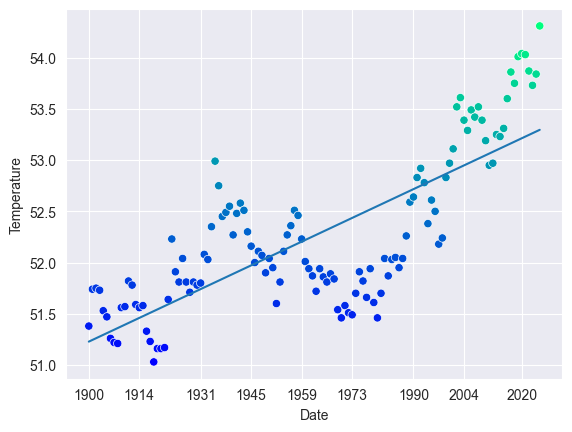

In [324]:
from matplotlib.dates import AutoDateLocator
from sklearn.metrics import mean_squared_error

axes = sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
# For estimate the error I use the mean squared error
print(f"Accuracy: {mean_squared_error(expected, predicted):.3f}")

# I make sure that the dates are well placed on the abscissa
axes.xaxis.set_major_locator(AutoDateLocator())

line = plt.plot(x, y)

As we can see, the accuracy is very low. This is because the relationship between variable isn't linear

# 2) SVC Classifier

In [325]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [326]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.8, random_state=42, center_box=(-5, 5))


In [327]:
# I use a polynomial kernel for the SVC model
svc_model = SVC(kernel='poly')
svc_model.fit(X, y)

SVC(kernel='poly')

### Plot creation

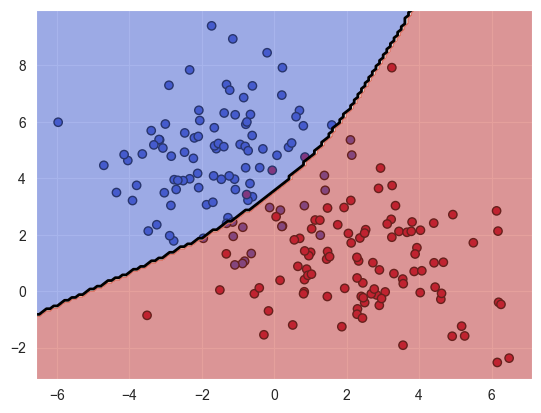

In [328]:
# Here I create a scatter plot, x-axis is the first column of X, y-axis is the second column of X
# colors represent the target variable y
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

# I take edge of plot using plt. lim, returns two coordinates of the plot boundaries
ylim = plt.ylim()
xlim = plt.xlim()

# I create a meshgrid of points from x and y limits using np.arange and np.meshgrid with 0.1 step
# np.arange creates an interval from minimum to maximum with 0.1 step
# meshgrid returns coordinate arrays
xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], 0.1),
                     np.arange(ylim[0], ylim[1], 0.1))

# Predict the response for each point in the grid
# np.ravel converts matrix to array
Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape predictions to match meshgrid shape
Z = Z.reshape(xx.shape)

# Plot decision boundary by coloring mesh points and drawing an outline
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')

From the plot, we see that the decision boundary generally separates the two classes effectively. However, some points deviate from their expected regions: a few red points are misclassified in the blue region, but it's not bad, as generalization may include some errors. Most importantly, the plot shows that the majority of points are correctly classified

# 3) Comparison of classification estimators

In [344]:
from sklearn.neighbors import KNeighborsClassifier

In [345]:
iris = sns.load_dataset('iris')

In [346]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [347]:
X = iris.iloc[:, [0, 1]]
y = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Accuracy for KNeighborsClassifier: 0.842


C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


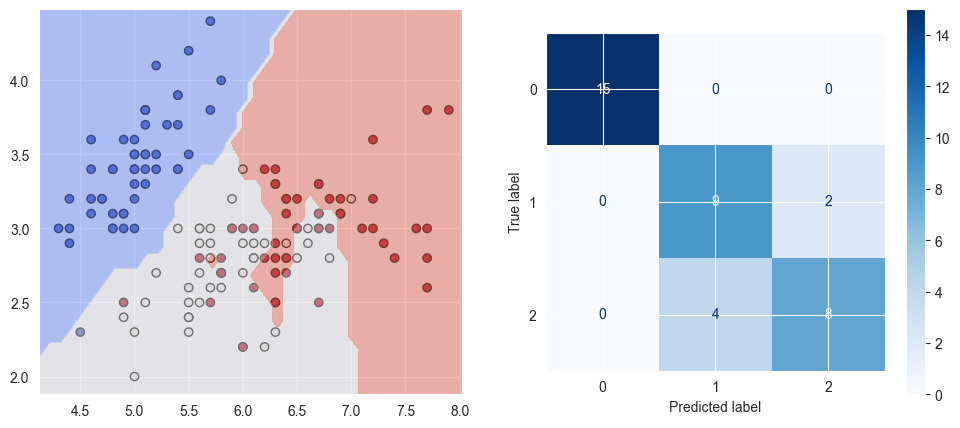

Accuracy for SVC: 0.842


C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


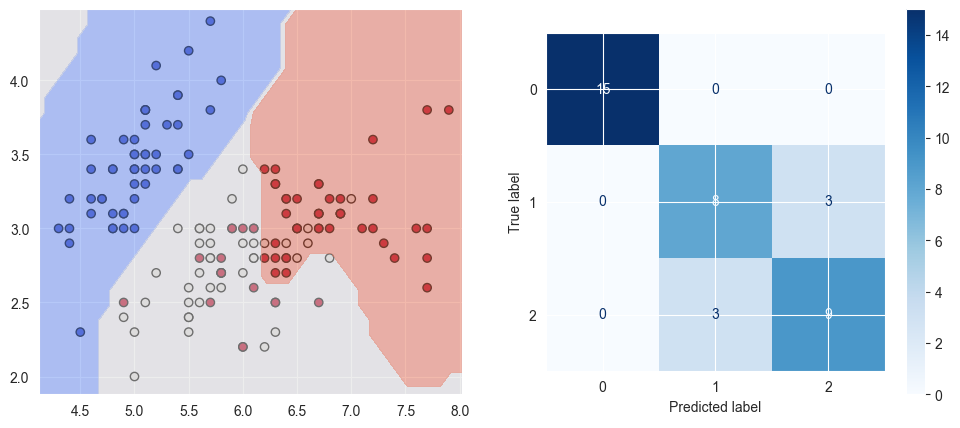

Accuracy for GaussianNB: 0.842


C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


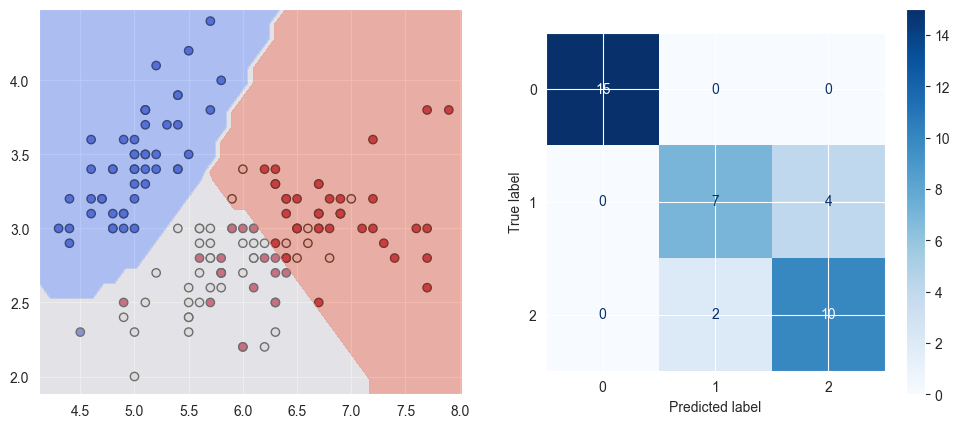

In [380]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    # From the experiment, n_neighbors shows the best performance for current data with a value of 6
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=6),
    'SVC': SVC(kernel='rbf', C=6, gamma=3),
    'GaussianNB': GaussianNB()
}


for name, model in models.items():
    current_model = model.fit(X_train, y_train)
    
    y_pred = current_model.predict(X_test)
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.3f}")

    cm = confusion_matrix(y_test, y_pred)

    # Creation two sublpots (left for scatter plot, right for confusion matrix)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # scatter plot
    axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c = y, cmap='coolwarm', edgecolors='k')
    
    ylim = axes[0].get_ylim()
    xlim = axes[0].get_xlim()
    xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], 0.1),
                         np.arange(ylim[0], ylim[1], 0.1))
    
    Z = current_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[0].contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm', levels=[-0.5, 0.5, 1.5, 2.5])

    # confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[1], cmap='Blues')
    
    plt.show()


As a result, while trying to select the best parameters for each model, I managed to achieve an accuracy of 0.842. Since all models produced the same result, I assume this is due to the small dataset.